Stock Market Prediction And Forecasting Using Stacked LSTM
## Keras and Tensorflow >2.0


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import yfinance as yf

In [ ]:
# Select a company or index
stock_symbol = "AAPL"

In [ ]:
# Download stock data from Yahoo Finance
df = yf.download(stock_symbol, period="5y", interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-10,41.250000,42.522499,40.832500,42.400002,40.695976,248104000
2018-12-11,42.915001,42.947498,41.750000,42.157501,40.463223,189126800
2018-12-12,42.599998,42.980000,42.255001,42.275002,40.576008,142510800
2018-12-13,42.622501,43.142502,42.387501,42.737499,41.019920,127594400
2018-12-14,42.250000,42.270000,41.320000,41.369999,39.707375,162814800
...,...,...,...,...,...,...
2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500
2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400
2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-12-10 to 2023-12-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:
df.shape

(1259, 6)

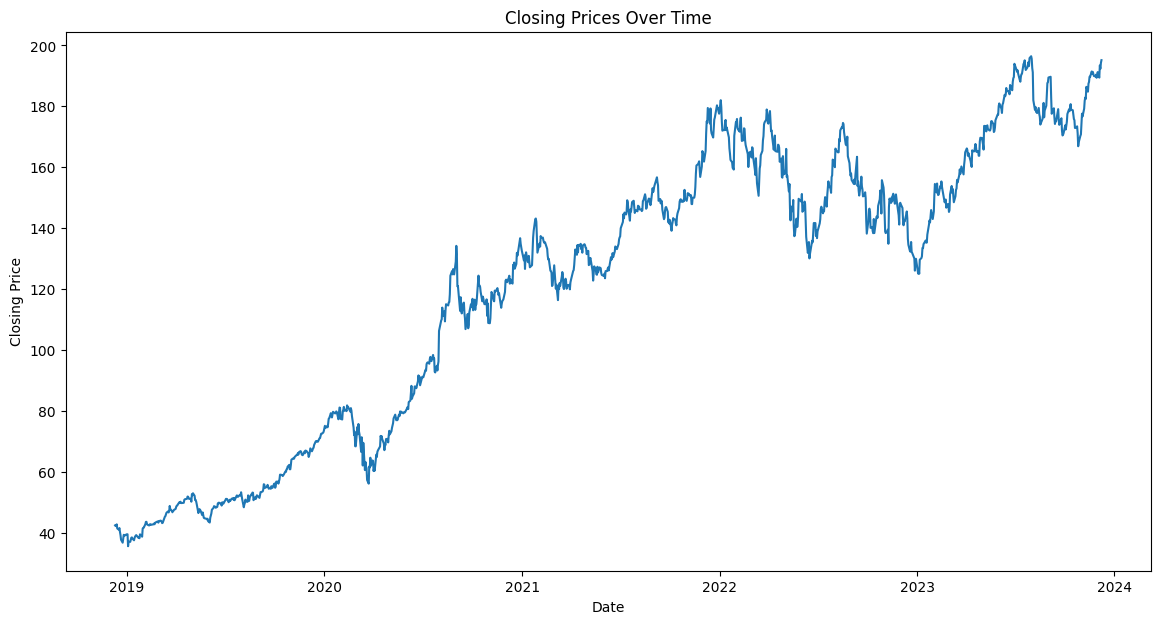

In [ ]:
# Plot the closing prices over time
plt.figure(figsize=(14, 7))
plt.title('Closing Prices Over Time')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


In [ ]:
# Extract the 'Close' column for prediction
data = df['Close'].values.reshape(-1, 1)

In [ ]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

In [ ]:
# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append((seq, target))
    return np.array([s[0] for s in sequences]), np.array([s[1] for s in sequences])

In [ ]:
# Define sequence length
sequence_length = 10

In [ ]:
# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [ ]:
# Reshape the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 6s 17ms/step - loss: 0.0327
Epoch 2/100
32/32 [==============================] - 0s 14ms/step - loss: 0.0017
Epoch 3/100
32/32 [==============================] - 0s 14ms/step - loss: 9.5871e-04
Epoch 4/100
32/32 [==============================] - 0s 13ms/step - loss: 8.9730e-04
Epoch 5/100
32/32 [==============================] - 0s 13ms/step - loss: 9.1421e-04
Epoch 6/100
32/32 [==============================] - 0s 14ms/step - loss: 9.4373e-04
Epoch 7/100
32/32 [==============================] - 0s 14ms/step - loss: 8.6969e-04
Epoch 8/100
32/32 [==============================] - 0s 14ms/step - loss: 8.6911e-04
Epoch 9/100
32/32 [==============================] - 0s 13ms/step - loss: 9.3073e-04
Epoch 10/100
32/32 [==============================] - 0s 15ms/step - loss: 9.1374e-04
Epoch 11/100
32/32 [==============================] - 0s 14ms/step - loss: 8.4466e-04
Epoch 12/100
32/32 [==============================] - 0s 14ms/step - lo

In [ ]:
# Make predictions
predictions = model.predict(X_test)

8/8 [==============================] - 1s 8ms/step


In [ ]:
# Inverse transform the predictions and actual values to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"\nMean Squared Error: {mse}")


Mean Squared Error: 7.2137990859577785


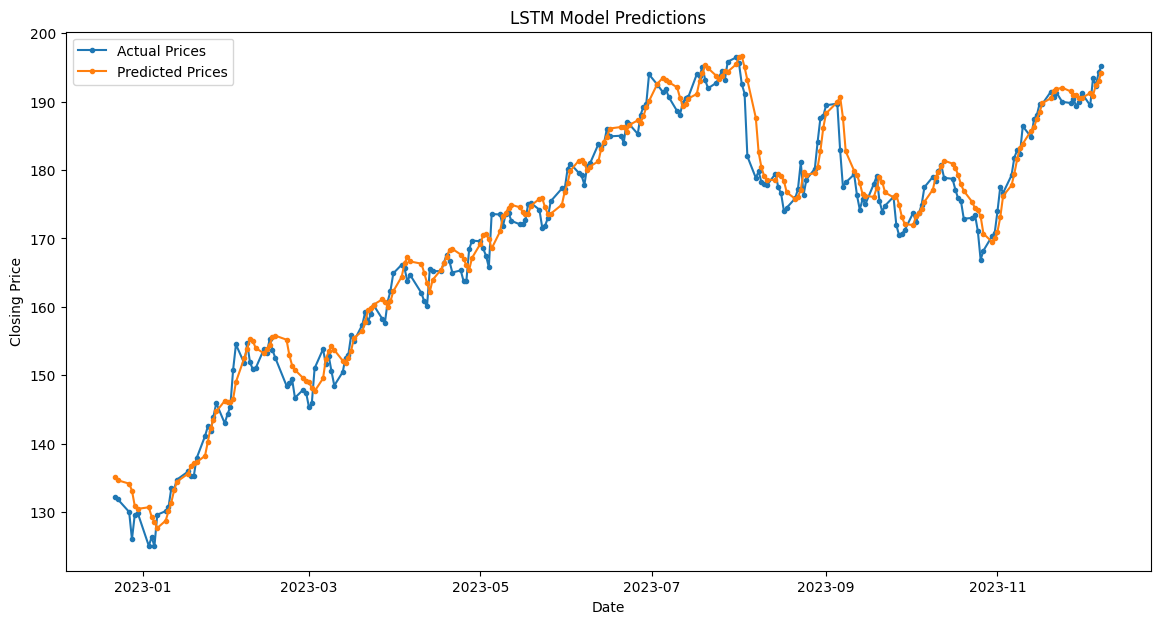

In [ ]:
# Plot the predictions against actual values
plt.figure(figsize=(14, 7))
plt.title('LSTM Model Predictions')
plt.plot(df.index[-len(predictions):], y_test, label='Actual Prices', marker='.')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Prices', marker='.')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()